In [1]:
#NishiSolanki.
#Regression: Linear Regression.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math

In [3]:
#Reading dataset csv.
dataset=pd.read_csv('PCOS_data_without_infertility.csv')

<AxesSubplot:>

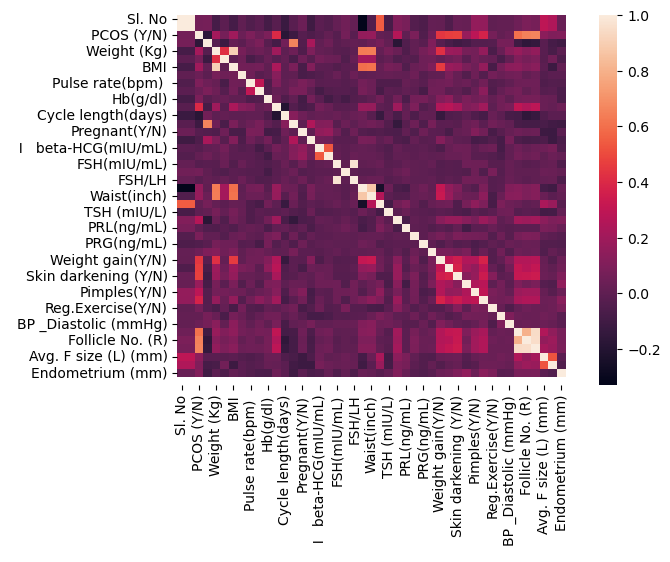

In [4]:
#See heatmap for correlation. 
sns.heatmap(dataset.corr( ), annot=False)

In [5]:
#Remove SI No. and patient file no.
#Remove unnamed because it is an extra row.
#Remove left and right follicle numbers since too correlated to the average number.
dataset = dataset.drop('Sl. No', axis=1)
dataset = dataset.drop('Patient File No.', axis=1)
dataset = dataset.drop('Unnamed: 45', axis=1)
dataset = dataset.drop('Follicle No. (R)', axis=1)
dataset = dataset.drop('Follicle No. (L)', axis=1)

#Remove any NaN values from dataset before taking train_test_split.
dataset.dropna(inplace=True)

In [6]:
#Linear Regression: Using coding example from class, and scikit_learn.

In [7]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [8]:
#Setting target to be the average follicle number (average of L and R).
y=dataset['Follicle No. (Ave)']
X=dataset.loc[:,dataset.columns!="Follicle No. (Ave)"]

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [10]:
#Create Ridge Regression object.
model_ridge = Ridge(alpha=0.5, max_iter=200, solver='auto', positive=False, random_state=40)

#Training model with train dataset.
model_ridge.fit(x_train, y_train)

Ridge(alpha=0.5, max_iter=200, random_state=40)

In [11]:
#Predict the response for train and test dataset. 
y_pred_train = model_ridge.predict(x_train)
y_pred_test = model_ridge.predict(x_test)

In [12]:
#Regression Model metrics, R2 score and RMSE for model comparison in final report.
print("Training R2:", r2_score(y_train[:161], y_pred_train[:161]))
print("RMSE_Training:",math.sqrt(mean_squared_error(y_train[:161], y_pred_train[:161])))

print("Testing R2:", r2_score(y_test[:161], y_pred_test[:161]))
print("RMSE_Testing:",math.sqrt(mean_squared_error(y_test[:161], y_pred_test[:161])))

Training R2: 0.4929087713646676
RMSE_Training: 2.8654997051936317
Testing R2: -0.5321364399606381
RMSE_Testing: 5.3813851036239235


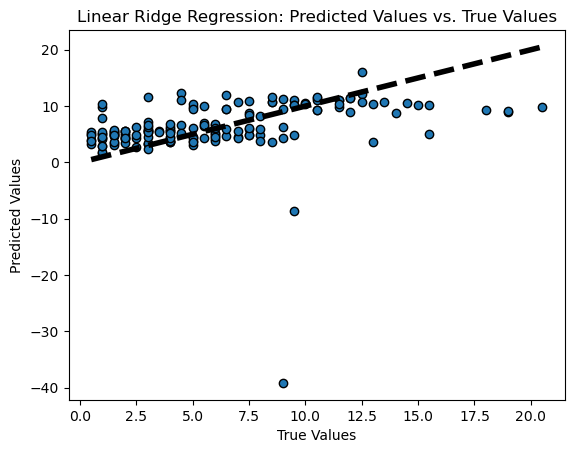

In [14]:
from sklearn.model_selection import cross_val_predict

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('True Values')
ax.set_ylabel('Predicted Values')
plt.title("Linear Ridge Regression: Predicted Values vs. True Values")
plt.show()